 # Steps in Machine Learning and model building
    1- Data Preprocessing
    2- train test data
    3- Algorithm setup
    4- Model fitting
    5- Prediction
    6- Model Evaluate
    7- Model export

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1- DATA PROCESSING

In [2]:
path ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [36]:
a = df[['ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [37]:
a.head()

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,AS5,8.5,196
1,2.4,4,M6,9.6,221
2,1.5,4,AV7,5.9,136
3,3.5,6,AS6,11.1,255
4,3.5,6,AS6,10.6,244


VISUALIZE DATA IN HISTROGRAM

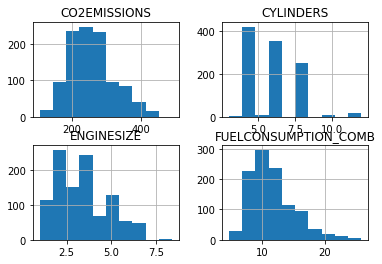

In [38]:
a.hist()
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001804BCE4940>]],
      dtype=object)

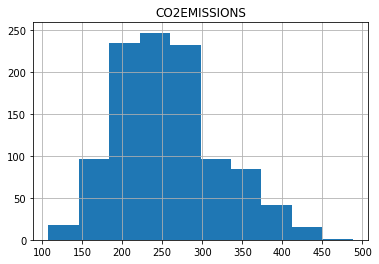

In [39]:
a.hist('CO2EMISSIONS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001804BDADD68>]],
      dtype=object)

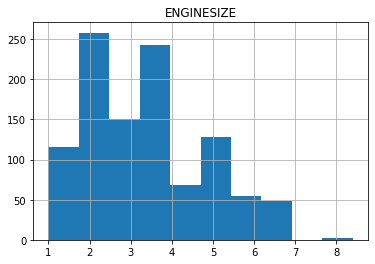

In [40]:
a.hist('ENGINESIZE')

Scatter Plot to see Linear Relation of each independent variable

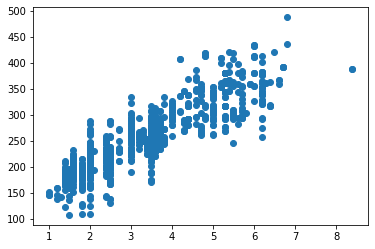

In [41]:
plt.scatter(x='ENGINESIZE',y='CO2EMISSIONS', data=a)

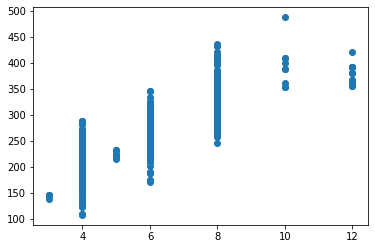

In [42]:
plt.scatter(x='CYLINDERS', y='CO2EMISSIONS', data=a)

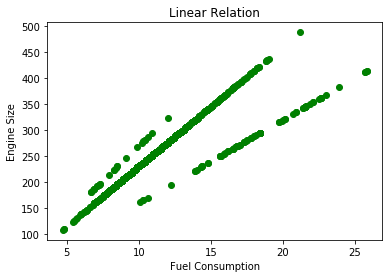

In [51]:
plt.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', data=a, color='green')
plt.title('Linear Relation')
plt.xlabel('Fuel Consumption')
plt.ylabel('Engine Size')
plt.show()

# STEP 2- TRAIN TEST SPLIT

CREATING TRAINING AND TESTING DATASET
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [60]:
ndf = np.random.rand(len(df)) < 0.8
train = a[ndf]
test = a[~ndf]

In [61]:
len(test)

226

In [62]:
len(train)

841

Train data distribution

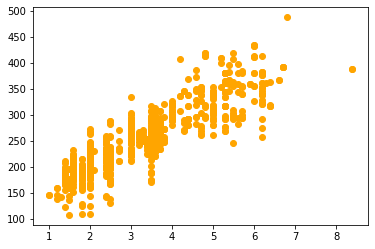

In [64]:
plt.scatter(x='ENGINESIZE', y='CO2EMISSIONS', data=train, color='orange')

# STEP-3 ALGORITHM SETUP

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [78]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# STEP -4 MODEL FITTING

In [79]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lr.coef_

array([[39.23728496]])

In [87]:
lr.intercept_

array([124.77645708])

In [ ]:
# Simple Linear Regression 
#y = a +bx
y= dependent variable
x= independent variable
a = intercept
b = coef(slope)
#y = 124 +39(3.5)

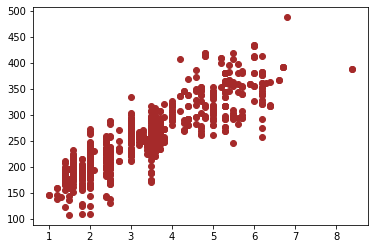

In [90]:
plt.scatter(x= 'ENGINESIZE', y='CO2EMISSIONS', data=train ,color='brown')

# STEP -5 PREDICTION

In [80]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [83]:
yhat = lr.predict(test_x)

In [84]:
yhat[0:5]

array([[203.251027  ],
       [218.94594099],
       [262.10695445],
       [262.10695445],
       [269.95441144]])

Plot output

Text(0, 0.5, 'Emission')

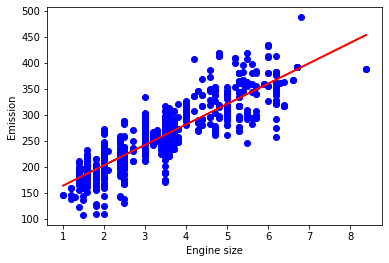

In [94]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [96]:
from sklearn.metrics import r2_score

In [97]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_yhat= lr.predict(test_x)

In [98]:
test_yhat[0:5]

array([[203.251027  ],
       [218.94594099],
       [262.10695445],
       [262.10695445],
       [269.95441144]])

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

In [99]:
# Mean absolute error
np.mean(np.absolute(test_yhat - test_y))

23.41519486892203

In [100]:
# Residual sum of Square(MSE)
np.mean(test_yhat - test_y)**2

0.5188737669384474

In [101]:
# R2-score
r2_score(test_yhat, test_y)

0.7110300422767952